In [1]:
##############################

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
rb = plt.cm.RdBu
bm = plt.cm.Blues

import warnings
warnings.filterwarnings('ignore')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.04/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
'''Command Line to Get the ACCESS-S data'''

##  scp -r ab2313@raijin.nci.org.au:/g/data2/ub7/access-s1/hc/calibrated_5km_v3/atmos/pr/daily/e01  /g/data1/w40/ab2313 


'Command Line to Get the ACCESS-S data'

In [3]:
directory = '/g/data1/w40/ab2313/e01/'

In [4]:
import glob

In [5]:
files = np.sort(glob.glob(directory + '*'))

In [6]:
files

array(['/g/data1/w40/ab2313/e01/daq5_pr_19900101_e01.nc',
       '/g/data1/w40/ab2313/e01/daq5_pr_19900109_e01.nc',
       '/g/data1/w40/ab2313/e01/daq5_pr_19900117_e01.nc', ...,
       '/g/data1/w40/ab2313/e01/daq5_pr_20121209_e01.nc',
       '/g/data1/w40/ab2313/e01/daq5_pr_20121217_e01.nc',
       '/g/data1/w40/ab2313/e01/daq5_pr_20121225_e01.nc'], dtype='<U47')

In [7]:
# Going through all the files and getting just the subset that you need
sub_files = []

for file in files[:11]:
    data  = xr.open_dataset(file, chunks = {'lat':50, 'lon':40})
    sub_data = data.sel(lat = slice(-23, 0)) # ONly need the tropical regins
    sub_data = sub_data.where(sub_data.pr >= 1 ) # Only need raindays
    sub_files.append(sub_data)
    


In [9]:
sub_files[0]

<xarray.Dataset>
Dimensions:  (lat: 261, lon: 886, time: 217)
Coordinates:
  * lat      (lat) float32 -23.0 -22.95 -22.9 -22.85 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.05 112.1 112.15 ... 156.15 156.2 156.25
  * time     (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-08-05T12:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<shape=(217, 261, 886), chunksize=(217, 20, 40)>
Attributes:
    Conventions:             CF-1.6
    acknowledgement:         Australian Bureau of Meteorology, Commonwealth o...
    author:                  Bureau of Meteorology
    copyright:               (C) Copyright Commonwealth of Australia (2017), ...
    creator_email:           poama@bom.gov.au
    creator_name:            Bureau of Meteorology
    creator_url:             http://poama.bom.gov.au
    disclaimer:              The data are subject to the Bureau of Meteorolog...
    distribution_statement:  The data are subject to the distribution terms o...
    ins

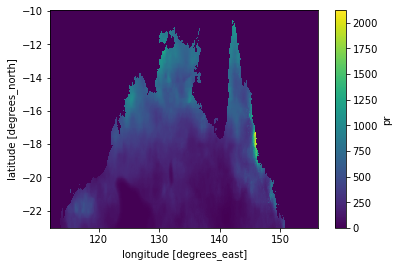

In [8]:
sub_files[0].pr.sum(dim = 'time').plot() 